# How to Build a Machine Learning Model in Python

## Learning Objectives
In the modeling stage of the machine learning process, our goal is to choose and apply the appropriate machine learning approach that works with the data we have and solves the problem that we intend to solve. If our objective is to build a model that predicts a numeric or continuous value, then our problem is known as a regression problem. One of the most common models used in solving regression problems is **Linear Regression**. By the end of the tutorial, you will have learned:

+ how to collect, explore and prepare data
+ how to build and evaluate a model

## 1. Collect the Data

In [49]:
import pandas as pd
bikes = pd.read_csv("https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/bikes.csv")
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


## 2. Explore the Data

In [50]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [51]:
bikes.describe() # descriptive Statistics

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


<AxesSubplot:xlabel='temperature', ylabel='rentals'>

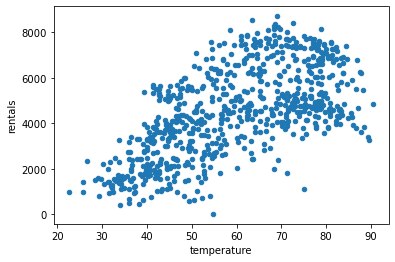

In [56]:
import matplotlib.pyplot as pl
%matplotlib inline 
bikes.plot(kind = 'scatter', x = 'temperature', y = 'rentals')

<AxesSubplot:xlabel='humidity', ylabel='rentals'>

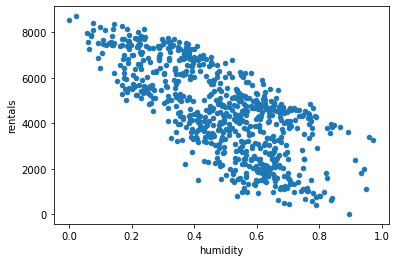

In [57]:
bikes.plot(kind = 'scatter', x = 'humidity', y = 'rentals')

<AxesSubplot:xlabel='windspeed', ylabel='rentals'>

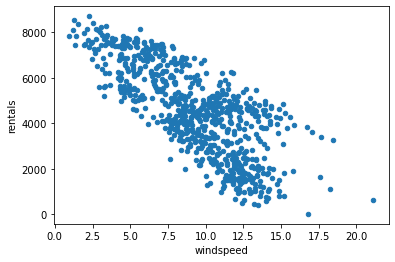

In [58]:
bikes.plot(kind = 'scatter', x = 'windspeed', y = 'rentals')

## 3. Prepare the Data

In [87]:
y=bikes[['rentals']]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [88]:
x=bikes.iloc[:,0:3]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


## Install sklearn library

In [14]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=42c96ad741ac58bfc1ed1d78268661340a8c25bb27e66f36362f15595bfcca79
  Stored in directory: c:\users\karthick\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [68]:
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


### train_test_split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

In [79]:
y_train

,rentals
271,4839
565,6591
449,4996
342,3620
488,6421
...,...
372,3425
204,3606
53,1917
294,4308


In [30]:
y_train

,rentals
360,1162
695,5087
590,6883
705,5375
567,4459
...,...
681,6269
135,3958
17,683
668,1096


## 4. Train the Model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [81]:
model.intercept_

array([3811.77357088])

In [35]:
model.coef_

array([[   80.1612583 , -4600.63176341,  -199.33717647]])

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

$y = 3800.68 + 80.35 \times temperature - 4665.74 \times humidity - 196.22 \times windspeed$

With the linear regression equation, we can estimate what our model will predict given any weather condition. For example, given a temperature of $72^{\circ}F$, $22\%$ humidity and windspeed of $5$ miles per hour, our model would predict:

$7,578 \text{ bikes} \approx 3800.68 + 80.35 \times 72 - 4665.74 \times .22 - 196.22 \times 5$


In [85]:
y_test

,rentals
21,981
322,3663
277,4826
524,7736
131,4864
...,...
62,1944
483,4220
282,5117
512,6591


In [46]:
x_test.iloc[1,:]

temperature    40.019000
humidity        0.374979
windspeed       7.693568
Name: 404, dtype: float64

## 5. Evaluate the Model

In [82]:
model.score(x_test, y_test)

0.9820688657007965

In [83]:
y_pred = model.predict(x_test)

In [84]:
y_pred

array([[ 563.10759512],
       [3576.1922912 ],
       [4815.43942496],
       [7523.61071216],
       [5036.57669461],
       [4489.52317091],
       [7733.9660823 ],
       [4514.88171359],
       [7294.35941465],
       [2160.71308514],
       [3803.44073803],
       [2140.51548152],
       [6734.11852679],
       [3369.36654086],
       [3633.48965882],
       [5933.37506399],
       [6798.32072131],
       [2989.50080057],
       [2029.16007213],
       [4039.52103541],
       [4748.33205384],
       [4994.45196687],
       [3883.15069622],
       [6512.72327704],
       [2492.6150494 ],
       [4474.11666765],
       [6269.49973113],
       [1998.69480818],
       [6191.49360377],
       [8793.47494761],
       [4513.73020624],
       [3328.05584057],
       [4642.24128899],
       [7410.4224769 ],
       [4984.43861944],
       [2815.66127537],
       [3507.0230653 ],
       [7903.8026602 ],
       [5079.78212838],
       [3756.91963919],
       [5312.93000095],
       [2098.655

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

209.75356434069437

In [54]:
y_pred.shape # training data

(183, 1)

In [55]:
y_test

,rentals
21,981
322,3663
277,4826
524,7736
131,4864
...,...
62,1944
483,4220
282,5117
512,6591


In [43]:
y_pred

array([[5551.31317415],
       [3760.99253227],
       [5546.74517794],
       [7616.50325992],
       [5280.74231193],
       [5631.79911857],
       [1482.99860983],
       [1302.76947132],
       [5665.92049797],
       [3812.15420019],
       [4132.12672652],
       [7999.65198389],
       [7583.15807732],
       [1301.08369952],
       [4499.12341127],
       [1340.13472201],
       [3569.38742773],
       [4733.95623859],
       [5472.9268347 ],
       [3330.09003131],
       [7958.64134985],
       [7368.92394884],
       [4857.99889809],
       [4904.21729288],
       [4443.9667219 ],
       [4026.44972469],
       [2353.42862139],
       [2226.32871453],
       [5722.75701004],
       [4641.52168746],
       [7201.42141452],
       [4748.30295561],
       [7394.30389244],
       [1035.62505576],
       [7380.01231116],
       [5700.14743574],
       [4865.67536555],
       [4220.49824131],
       [6786.18682244],
       [2984.37567809],
       [6922.09811835],
       [7376.785